In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle
import statistics

In [2]:
# Importing the dataset
dataset = pd.read_excel('C:\\Users\\insbattula\\Downloads\\Waffle Project\\Training dataset.xlsx')
dataset.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,Wafer-1,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,0.0032,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586
1,Wafer-2,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586
2,Wafer-3,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,0.0023,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153
3,Wafer-4,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,0.0075,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979
4,Wafer-5,3010.41,2632.80,2203.9000,1116.4129,1.2639,100.0,102.2733,0.1199,1.4227,...,0.0101,125.0600,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600


In [3]:
dataset.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
count,1531.000000,1530.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.000000,1528.000000,1535.000000,1535.000000,...,595.000000,595.000000,1536.000000,1536.000000,1536.000000,1536.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,3015.024193,2495.483771,2200.370187,1400.184797,4.255665,100.0,101.062428,0.121817,1.461905,-0.000798,...,0.005352,97.796315,0.500105,0.015029,0.003782,3.007635,0.021432,0.016414,0.005268,99.777881
std,73.908774,80.495576,29.461460,443.937101,56.906664,0.0,6.267841,0.009045,0.074078,0.015020,...,0.003110,88.689937,0.003357,0.012700,0.002733,2.641657,0.012398,0.008768,0.002865,94.560344
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2967.465000,2452.182500,2180.966600,1084.377900,1.017700,100.0,97.840000,0.121100,1.410300,-0.010650,...,0.003300,45.833000,0.497900,0.011600,0.003100,2.309525,0.013400,0.010600,0.003300,44.235500
50%,3012.090000,2498.840000,2200.988900,1287.353800,1.316800,100.0,101.492200,0.122400,1.460700,-0.001300,...,0.004600,71.533300,0.500150,0.013800,0.003600,2.758950,0.020700,0.014800,0.004600,71.575300
75%,3057.390000,2538.500000,2217.866700,1593.122000,1.529100,100.0,104.525550,0.123800,1.516400,0.008300,...,0.006400,116.888550,0.502325,0.016500,0.004100,3.295575,0.027600,0.020300,0.006400,115.100500
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800


In [4]:
#dataset1 = dataset.replace(0,np.nan).dropna(axis=1,how='all')
#dataset1.describe()
#dataset2 = dataset1.replace(np.nan,0)

In [5]:
dataset2 = dataset.iloc[:, 1:255]

In [6]:
dataset2.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254
count,1531.000000,1530.000000,1523.000000,1523.000000,1523.000000,1523.0,1523.000000,1528.000000,1535.000000,1535.000000,...,549.000000,549.000000,549.000000,830.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1513.000000
mean,3015.024193,2495.483771,2200.370187,1400.184797,4.255665,100.0,101.062428,0.121817,1.461905,-0.000798,...,0.005755,1.729723,4.148742,0.052583,0.024949,0.000952,109.427011,0.004310,4.673636,0.033204
std,73.908774,80.495576,29.461460,443.937101,56.906664,0.0,6.267841,0.009045,0.074078,0.015020,...,0.084618,4.335614,10.045084,0.066576,0.049021,0.015034,54.744159,0.037829,64.979796,0.022584
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000300,0.291400,1.102200,0.000000,0.003000,0.000000,21.010700,0.000300,0.767300,0.009400
25%,2967.465000,2452.182500,2180.966600,1084.377900,1.017700,100.0,97.840000,0.121100,1.410300,-0.010650,...,0.001200,0.911500,2.725900,0.019100,0.014600,0.000000,75.952600,0.000700,2.198300,0.024500
50%,3012.090000,2498.840000,2200.988900,1287.353800,1.316800,100.0,101.492200,0.122400,1.460700,-0.001300,...,0.001700,1.185100,3.673000,0.026500,0.020800,0.000000,103.034900,0.001000,2.863800,0.030800
75%,3057.390000,2538.500000,2217.866700,1593.122000,1.529100,100.0,104.525550,0.123800,1.516400,0.008300,...,0.002600,1.761800,4.479700,0.050300,0.027300,0.000000,131.381800,0.001300,3.795300,0.037800
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,1.984400,99.902200,237.183700,0.491400,0.973200,0.413800,1119.704200,0.990900,2549.988500,0.451700


In [7]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Columns: 254 entries, Sensor-1 to Sensor-254
dtypes: float64(254)
memory usage: 3.0 MB


In [8]:
#drop the ccolumns for which mean is zero
dataset3 = dataset2.drop(dataset2.columns[dataset2.apply(lambda col: col.mean() == 0)], axis=1)

In [9]:
#drop the ccolumns for which std dev is zero
#[dataset2.apply(lambda col: col.mean() == 0)]

#dataset4 = dataset2.drop(dataset2.columns[dataset2.std() == 0], axis=1)
dataset5 = dataset2.drop(dataset2.columns[dataset2.apply(lambda col: col.std() == 0)], axis=1)

In [10]:
#column to be dropped
dataset2.columns[dataset2.apply(lambda col: col.std() == 0)]

Index(['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53',
       'Sensor-70', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179',
       'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192',
       'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-227', 'Sensor-230',
       'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235',
       'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242',
       'Sensor-243', 'Sensor-244'],
      dtype='object')

In [11]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Columns: 222 entries, Sensor-1 to Sensor-254
dtypes: float64(222)
memory usage: 2.6 MB


In [12]:
dataset5.shape

(1537, 222)

In [32]:
#use imputer function to handle the Nan values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.preprocessing import Imputer
# fill missing values with mean column values
iterImp=IterativeImputer(max_iter=2)
#imputer = Imputer()
iter_Data = iterImp.fit_transform(dataset5)

C:\Users\insbattula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [33]:
iter_Data

array([[2.98830000e+03, 2.51905000e+03, 2.20885560e+03, ...,
        1.50000000e-03, 2.36630000e+00, 3.50000000e-02],
       [2.98732000e+03, 2.52881000e+03, 2.20863148e+03, ...,
        1.00000000e-03, 3.36000000e+00, 2.75000000e-02],
       [3.00277126e+03, 2.48185000e+03, 2.20738890e+03, ...,
        8.00000000e-04, 3.44700000e+00, 2.63000000e-02],
       ...,
       [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
        9.00000000e-04, 3.67740000e+00, 2.47862615e-02],
       [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
        1.20000000e-03, 3.87060000e+00, 2.69246837e-02],
       [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
        9.00000000e-04, 2.29550000e+00, 3.41534144e-02]])

In [34]:
#moving to Data frame after handing the m issing values using imputer
DataFrame_Final=pd.DataFrame(data=iter_Data,columns=dataset5.columns)
DataFrame_Final.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254
0,2988.300000,2519.05,2208.855600,1157.72240,1.550900,107.802200,0.1233,1.5362,-0.0259,-0.0179,...,-0.033695,0.689276,-0.207728,0.028300,0.0136,0.0,139.9570,0.0015,2.3663,0.0350
1,2987.320000,2528.81,2208.631479,1493.62127,4.287742,100.565238,0.1195,1.6343,-0.0263,0.0116,...,-0.008199,1.304279,2.382826,0.048186,0.0140,0.0,40.6750,0.0010,3.3600,0.0275
2,3002.771255,2481.85,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5559,0.0002,-0.0044,...,-0.005313,1.337760,2.933411,0.046368,0.0116,0.0,62.2225,0.0008,3.4470,0.0263
3,3002.270000,2497.45,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5465,0.0195,-0.0114,...,-0.009914,0.950016,2.295950,0.036903,0.0224,0.0,49.4254,0.0010,3.2127,0.0198
4,3010.410000,2632.80,2203.900000,1116.41290,1.263900,102.273300,0.1199,1.4227,0.0194,0.0073,...,-0.070731,0.817635,-0.638495,0.022500,0.0364,0.0,117.9089,0.0009,3.2675,0.0473


In [35]:
#used kmean algorithem to indentify the clusters and kmean
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(DataFrame_Final)   
    wcss.append(kmeans.inertia_)

In [36]:
print(wcss)

[115461749391.07623, 63625976456.30333, 48300881027.20753, 40138803388.336494, 36235283483.75119, 32441813982.74221, 29517592964.65275, 26996801559.250717, 25096971319.531483, 23874719781.36806]


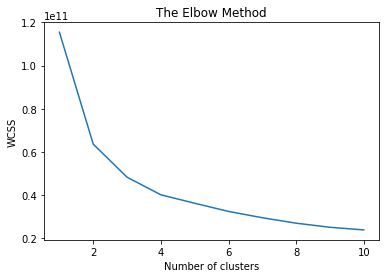

In [37]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(DataFrame_Final)
print(y_kmeans)

[2 3 2 ... 2 2 2]


In [39]:
#load the out data and move to main data set
output=pd.read_excel('C:\\Users\\insbattula\\Downloads\\Waffle Project\\Training outputs.xlsx')
output.head()
#dataset = pd.read_excel('C:\\Users\\insbattula\\Downloads\\Waffle Project\\Training dataset.xlsx')


,Unnamed: 0,Good/Bad
0,Wafer-1,-1
1,Wafer-2,-1
2,Wafer-3,-1
3,Wafer-4,-1
4,Wafer-5,-1


In [40]:
DataFrame_Final['Label'] = output['Good/Bad']
DataFrame_Final.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Label
0,2988.300000,2519.05,2208.855600,1157.72240,1.550900,107.802200,0.1233,1.5362,-0.0259,-0.0179,...,0.689276,-0.207728,0.028300,0.0136,0.0,139.9570,0.0015,2.3663,0.0350,-1
1,2987.320000,2528.81,2208.631479,1493.62127,4.287742,100.565238,0.1195,1.6343,-0.0263,0.0116,...,1.304279,2.382826,0.048186,0.0140,0.0,40.6750,0.0010,3.3600,0.0275,-1
2,3002.771255,2481.85,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5559,0.0002,-0.0044,...,1.337760,2.933411,0.046368,0.0116,0.0,62.2225,0.0008,3.4470,0.0263,-1
3,3002.270000,2497.45,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5465,0.0195,-0.0114,...,0.950016,2.295950,0.036903,0.0224,0.0,49.4254,0.0010,3.2127,0.0198,-1
4,3010.410000,2632.80,2203.900000,1116.41290,1.263900,102.273300,0.1199,1.4227,0.0194,0.0073,...,0.817635,-0.638495,0.022500,0.0364,0.0,117.9089,0.0009,3.2675,0.0473,-1


In [41]:
DataFrame_Final['cluster']=y_kmeans
DataFrame_Final.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Label,cluster
0,2988.300000,2519.05,2208.855600,1157.72240,1.550900,107.802200,0.1233,1.5362,-0.0259,-0.0179,...,-0.207728,0.028300,0.0136,0.0,139.9570,0.0015,2.3663,0.0350,-1,2
1,2987.320000,2528.81,2208.631479,1493.62127,4.287742,100.565238,0.1195,1.6343,-0.0263,0.0116,...,2.382826,0.048186,0.0140,0.0,40.6750,0.0010,3.3600,0.0275,-1,3
2,3002.771255,2481.85,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5559,0.0002,-0.0044,...,2.933411,0.046368,0.0116,0.0,62.2225,0.0008,3.4470,0.0263,-1,2
3,3002.270000,2497.45,2207.388900,962.53170,1.204300,104.031100,0.1210,1.5465,0.0195,-0.0114,...,2.295950,0.036903,0.0224,0.0,49.4254,0.0010,3.2127,0.0198,-1,2
4,3010.410000,2632.80,2203.900000,1116.41290,1.263900,102.273300,0.1199,1.4227,0.0194,0.0073,...,-0.638495,0.022500,0.0364,0.0,117.9089,0.0009,3.2675,0.0473,-1,2


In [42]:
DataFrame_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Columns: 224 entries, Sensor-1 to cluster
dtypes: float64(222), int32(1), int64(1)
memory usage: 2.6 MB


In [24]:
#DataFrame_Final1=DataFrame_Final[DataFrame_Final['cluster']==0]
#DataFrame_Final1.head()


In [43]:
X=DataFrame_Final.iloc[:,0:221].values
y=DataFrame_Final.iloc[:,222].values
y


array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create a Gaussian Classifier
Decision_clf=DecisionTreeClassifier(max_depth=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
Decision_clf.fit(X_train,y_train)

y_pred=Decision_clf.predict(X_test)



In [46]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Using Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Using Decision Tree Accuracy: 0.9253246753246753


In [47]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF_clf=RandomForestClassifier(n_estimators=13)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(X_train,y_train)

y_pred=RF_clf.predict(X_test)


In [30]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Using Random forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

Using Random forest Accuracy: 0.9285714285714286
